<a href="https://colab.research.google.com/github/Urmila-Chintalapudi/prodigy_tasks/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Customer Segmentation using K-Means Clustering


In [ ]:
'''Project: Grouping Mall Customers Based on Spending Behavior
This project uses the Mall Customer Segmentation Data from Kaggle to group
customers into clusters based on their annual income and spending score.
This helps businesses tailor marketing strategies and improve customer engagement.'''

'Project: Grouping Mall Customers Based on Spending Behavior\nThis project uses the Mall Customer Segmentation Data from Kaggle to group \ncustomers into clusters based on their annual income and spending score. \nThis helps businesses tailor marketing strategies and improve customer engagement.'

In [ ]:
# 1. Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [ ]:
# Loading and Inspecting Data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")  # No full path needed
df.head()  # Optional: see first 5 rows


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
# Checking for missing data
print(df.isnull().sum())  # No missing values in this dataset

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# 2. Exploratory Data Analysis (EDA)

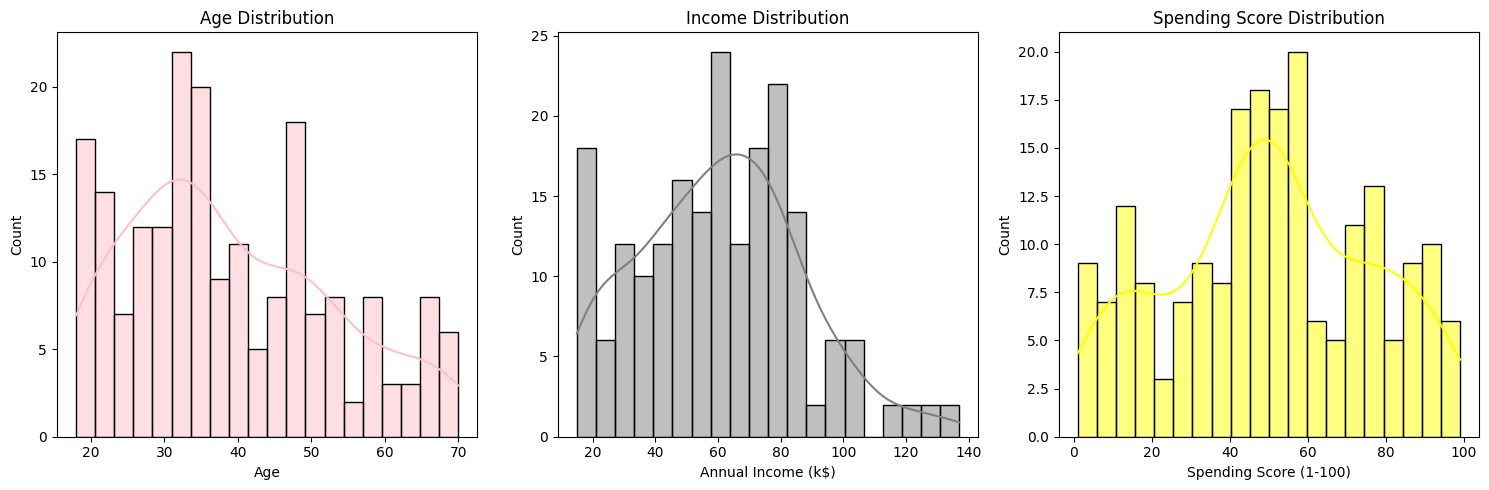

In [ ]:
# Distribution of Age, Income, and Spending Score
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True,color='pink')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True,color='grey')
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True,color='yellow')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Gender Wise Spending Habits

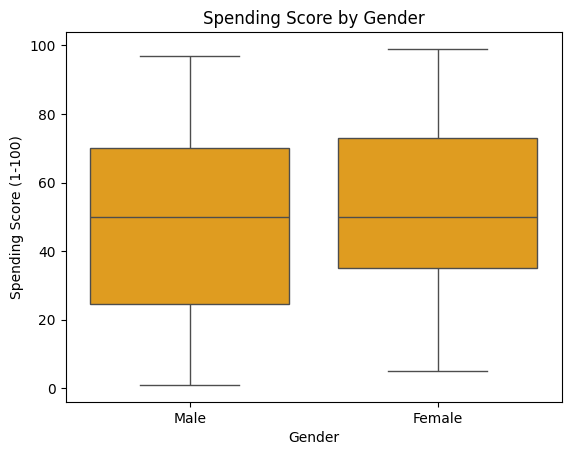

In [ ]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df,color='orange')
plt.title('Spending Score by Gender')
plt.show()

In [ ]:
# 3. Feature Selection & Preprocessing


In [ ]:
'''Selecting Relevant Features
We'll use Annual Income and Spending Score for clustering.'''

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize Features (K-Means is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Finding Optimal Number of Clusters (K)
# using Elbow Method

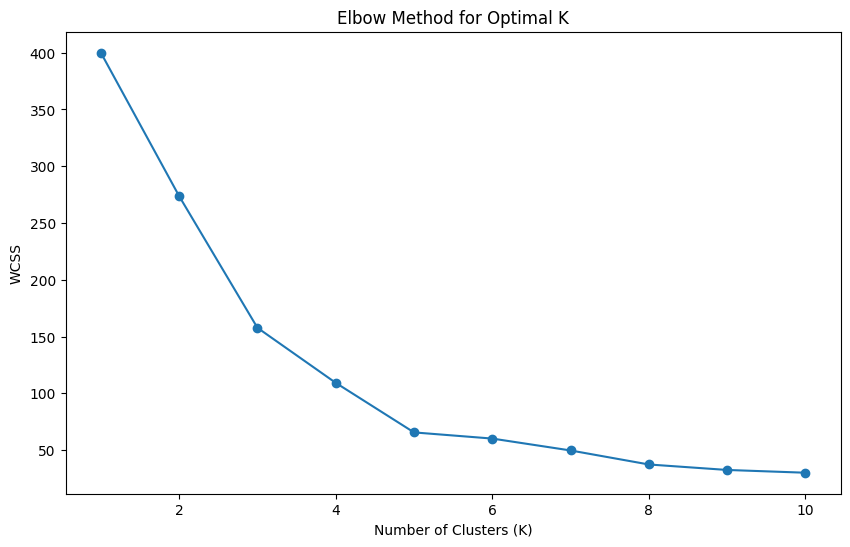

In [ ]:
wcss = []  # Within-Cluster Sum of Squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

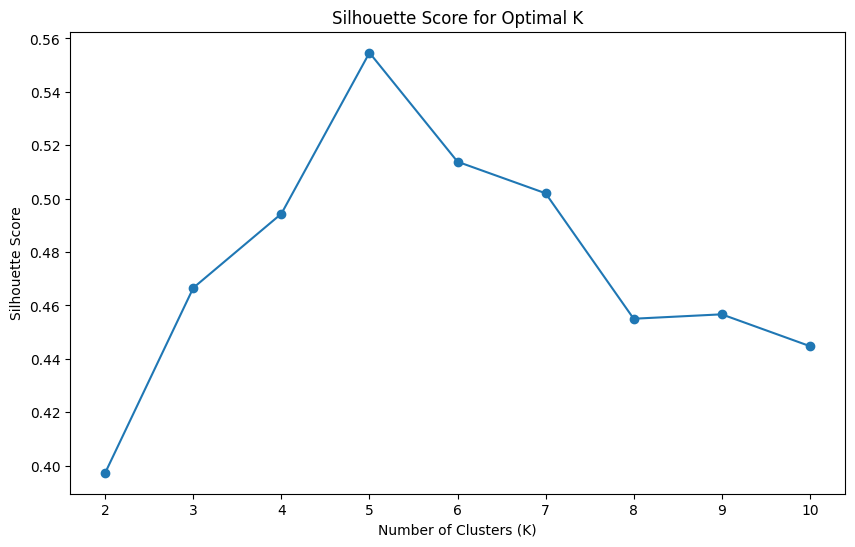

In [ ]:
# Silhouette Score (Alternative Method)
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [ ]:
#  5 Applying K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster distribution
print(df['Cluster'].value_counts())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [ ]:
# Cluster Analysis
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Age': 'mean'
}).round(2)

print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)    Age
Cluster                                                   
0                     55.30                   49.52  42.72
1                     86.54                   82.13  32.69
2                     25.73                   79.36  25.27
3                     88.20                   17.11  41.11
4                     26.30                   20.91  45.22


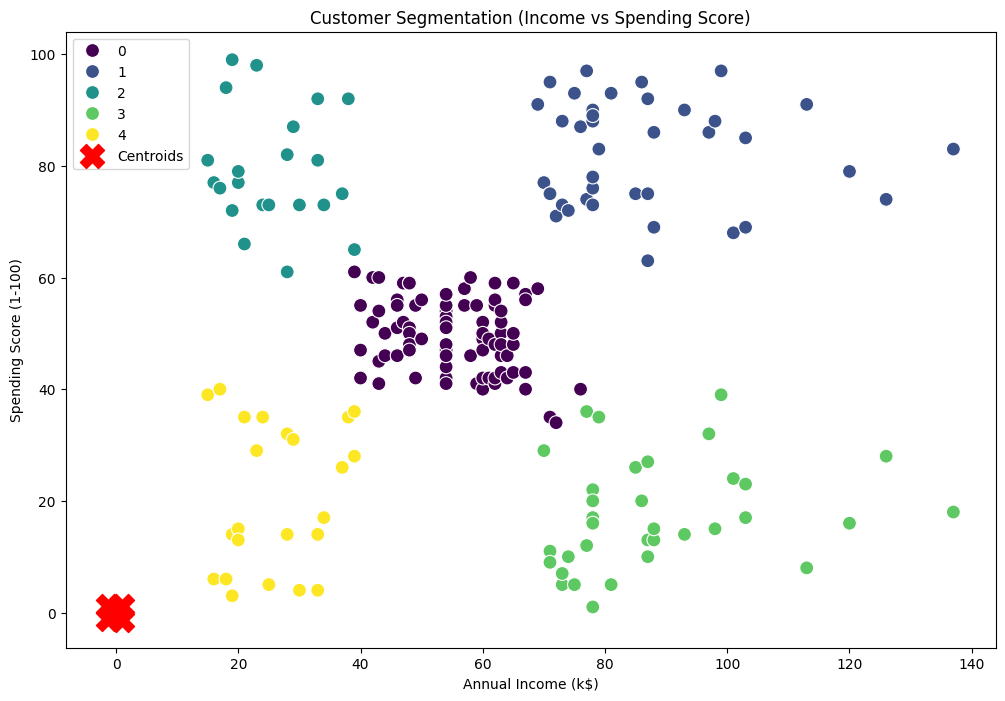

In [ ]:
# Visualise Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)
plt.title('Customer Segmentation (Income vs Spending Score)')
plt.legend()
plt.show()

In [ ]:
# 7. Saving & Deploying the Model

In [ ]:
import joblib

joblib.dump(kmeans, 'mall_customer_kmeans.pkl')
joblib.dump(scaler, 'mall_customer_scaler.pkl')

['mall_customer_scaler.pkl']

In [ ]:
# Predicting New Customers

In [ ]:
def predict_cluster(new_data):
    scaler = joblib.load('mall_customer_scaler.pkl')
    model = joblib.load('mall_customer_kmeans.pkl')
    new_data_scaled = scaler.transform(new_data)
    return model.predict(new_data_scaled)

# Example
new_customer = [[40, 60]]  # Annual Income=40k, Spending Score=60
print(f"Predicted Cluster: {predict_cluster(new_customer)[0]}")

Predicted Cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#Conclusion
''' Successfully segmented mall customers into 5 distinct groups.
Insights can be used for personalized marketing and store optimization.

Future Improvements:
Include Age and Gender in clustering.
Try DBSCAN or Hierarchical Clustering for comparison.'''

